# Plotting #

/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


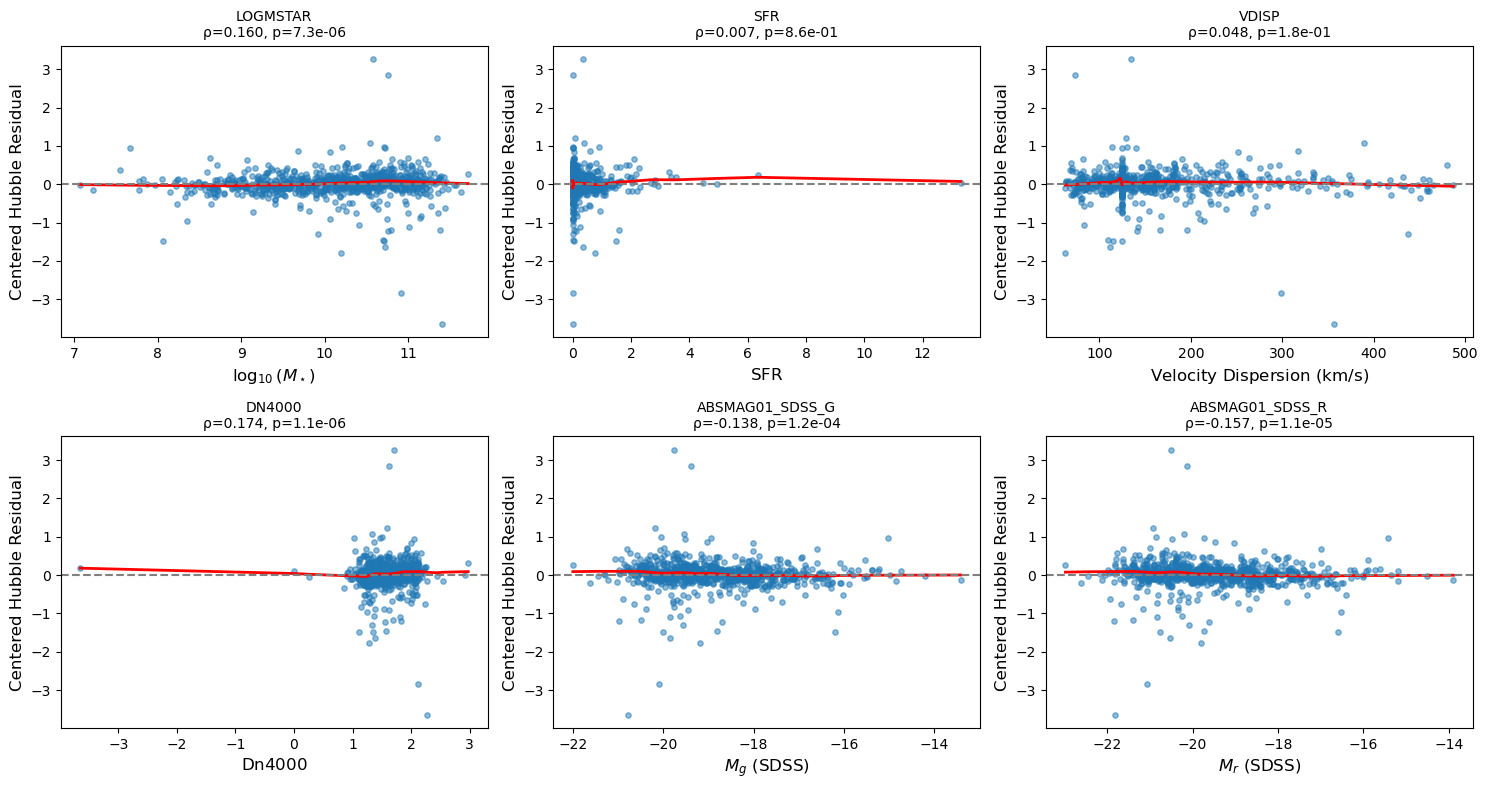

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

# --------------------------------------
# Load merged SN + DESI FASTSPEC file
# --------------------------------------
df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_with_residuals.csv")

# Drop NaN residuals if any
df = df.dropna(subset=["residual_centered"])

# --------------------------------------
# LOWESS helper
# --------------------------------------

def add_lowess(ax, x, y, frac=0.3):
    mask = x.notna() & y.notna()
    smoothed = sm.nonparametric.lowess(y[mask], x[mask], frac=frac, return_sorted=True)
    ax.plot(smoothed[:, 0], smoothed[:, 1], lw=2.0, color = "red")

# --------------------------------------
# Properties you want to examine
# --------------------------------------
properties = [
    ("LOGMSTAR", r"$\log_{10}(M_\star)$"),
    ("SFR",      r"${\rm SFR}$"),
    ("VDISP",    r"${\rm Velocity~Dispersion~(km/s)}$"),
    ("DN4000",   r"${\rm Dn4000}$"),
    ("ABSMAG01_SDSS_G", r"$M_g~({\rm SDSS})$"),
    ("ABSMAG01_SDSS_R", r"$M_r~({\rm SDSS})$")
]

# --------------------------------------
# Plotting loop
# --------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, (col, label) in zip(axes, properties):

    if col not in df.columns:
        ax.set_visible(False)
        continue

    x = df[col]
    y = df["residual_centered"]

    # Scatter
    ax.scatter(x, y, alpha=0.5, s=15)

    # LOWESS
    add_lowess(ax, x, y)

    # Spearman correlation
    mask = x.notna() & y.notna()
    rho, p = spearmanr(x[mask], y[mask])

    # Labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel("Centered Hubble Residual", fontsize=12)
    ax.axhline(0, color="gray", ls="--")

    ax.set_title(f"{col}\nρ={rho:.3f}, p={p:.1e}", fontsize=10)

plt.tight_layout()
plt.show()

/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


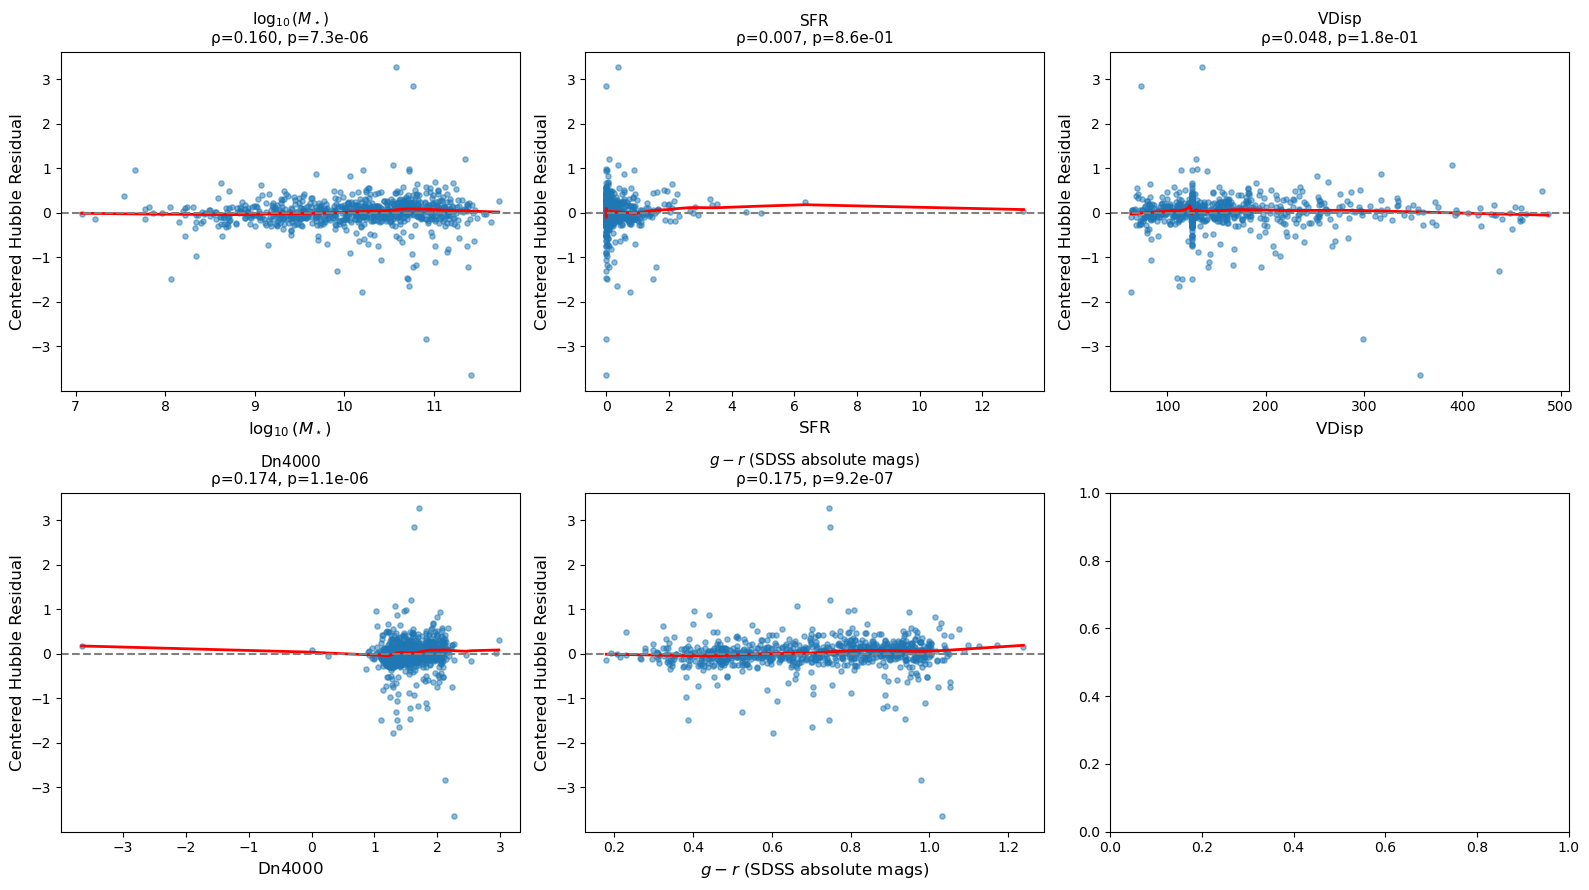

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

# Load merged file
df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_with_residuals.csv")

# --------------------------------------
# Create g - r host-galaxy color
# --------------------------------------
df["SDSS_g_minus_r"] = df["ABSMAG01_SDSS_G"] - df["ABSMAG01_SDSS_R"]

# --------------------------------------
# LOWESS helper
# --------------------------------------
def add_lowess(ax, x, y, frac=0.3):
    mask = x.notna() & y.notna()
    smoothed = sm.nonparametric.lowess(y[mask], x[mask], frac=frac, return_sorted=True)
    ax.plot(smoothed[:, 0], smoothed[:, 1], lw=2.0, color = "red")

# --------------------------------------
# Properties to plot (updated!)
# --------------------------------------
properties = [
    ("LOGMSTAR", r"$\log_{10}(M_\star)$"),
    ("SFR",      r"${\rm SFR}$"),
    ("VDISP",    r"${\rm VDisp}$"),
    ("DN4000",   r"${\rm Dn4000}$"),
    ("SDSS_g_minus_r", r"$g - r~{\rm (SDSS ~ absolute ~ mags)}$")
]

# --------------------------------------
# Plotting loop
# --------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for ax, (col, label) in zip(axes, properties):

    if col not in df.columns:
        ax.set_visible(False)
        continue

    x = df[col]
    y = df["residual_centered"]

    # Scatter
    ax.scatter(x, y, alpha=0.5, s=14)

    # LOWESS trend
    add_lowess(ax, x, y)

    # Spearman correlation
    mask = x.notna() & y.notna()
    rho, p = spearmanr(x[mask], y[mask])

    # Labels + line
    ax.axhline(0, color="gray", ls="--")
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel("Centered Hubble Residual", fontsize=12)
    ax.set_title(f"{label}\nρ={rho:.3f}, p={p:.1e}", fontsize=11)

plt.tight_layout()
plt.show()

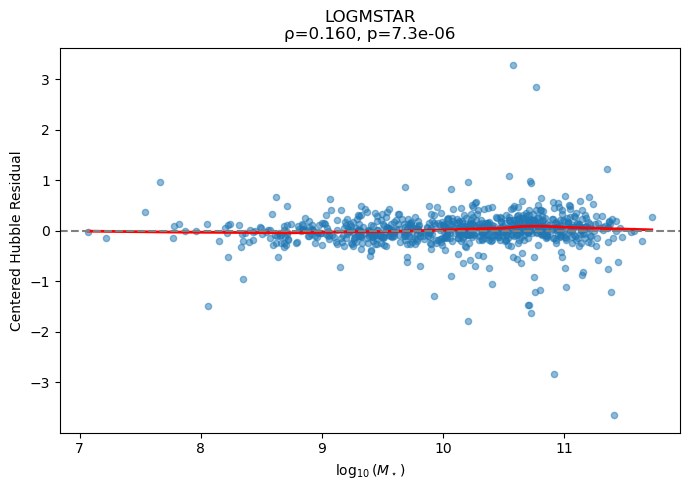

/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


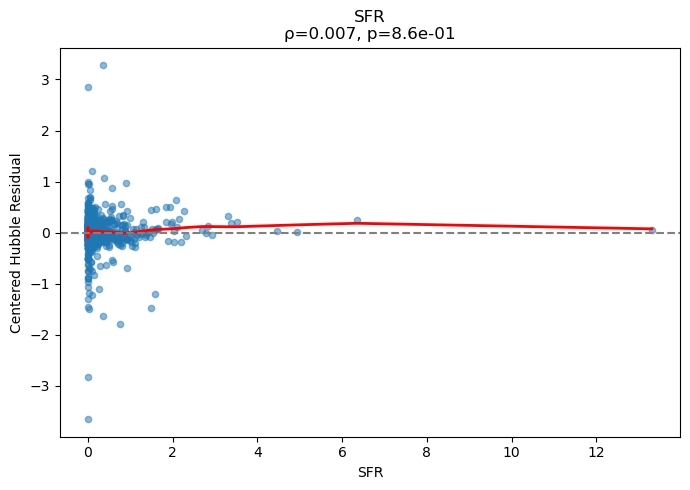

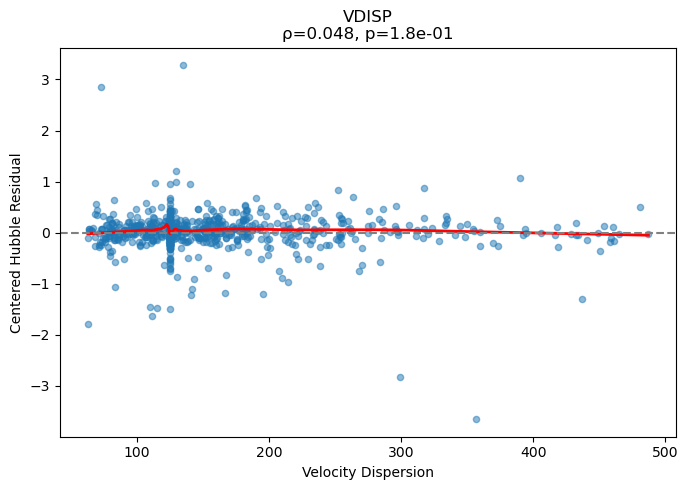

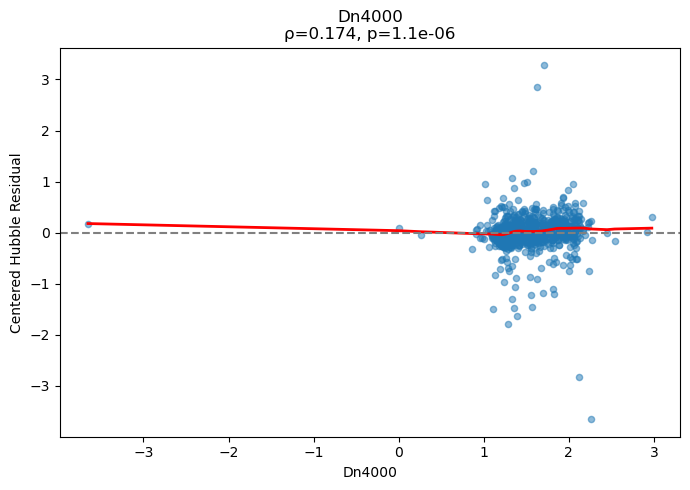

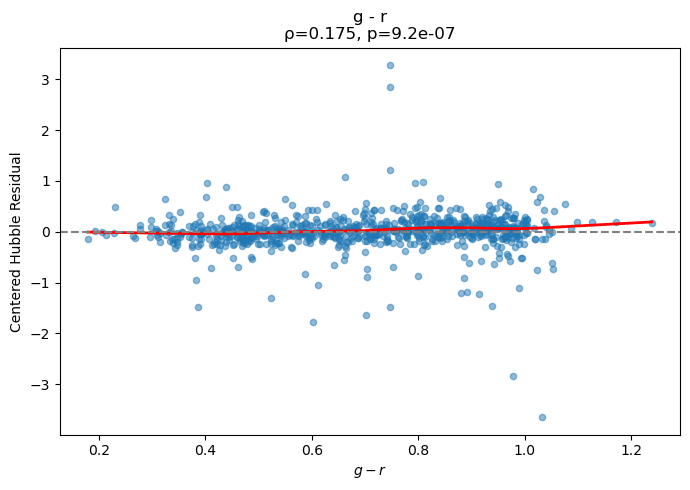

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

# Load merged file
df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_with_residuals.csv")

# Create g - r color
df["SDSS_g_minus_r"] = df["ABSMAG01_SDSS_G"] - df["ABSMAG01_SDSS_R"]

# LOWESS helper
def add_lowess(ax, x, y, frac=0.3):
    mask = x.notna() & y.notna()
    smoothed = sm.nonparametric.lowess(y[mask], x[mask], frac=frac, return_sorted=True)
    ax.plot(smoothed[:, 0], smoothed[:, 1], lw=2.0, color="red")

# ============================================================
# 1) LOGMSTAR
# ============================================================
x = df["LOGMSTAR"]
y = df["residual_centered"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.5, s=20)
add_lowess(plt.gca(), x, y)

rho, p = spearmanr(x.dropna(), y[x.notna()])
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel(r"$\log_{10}(M_\star)$")
plt.ylabel("Centered Hubble Residual")
plt.title(f"LOGMSTAR\nρ={rho:.3f}, p={p:.1e}")
plt.tight_layout()
plt.show()

# ============================================================
# 2) SFR
# ============================================================
x = df["SFR"]
y = df["residual_centered"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.5, s=20)
add_lowess(plt.gca(), x, y)

rho, p = spearmanr(x.dropna(), y[x.notna()])
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("SFR")
plt.ylabel("Centered Hubble Residual")
plt.title(f"SFR\nρ={rho:.3f}, p={p:.1e}")
plt.tight_layout()
plt.show()

# ============================================================
# 3) VDISP
# ============================================================
x = df["VDISP"]
y = df["residual_centered"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.5, s=20)
add_lowess(plt.gca(), x, y)

rho, p = spearmanr(x.dropna(), y[x.notna()])
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Velocity Dispersion")
plt.ylabel("Centered Hubble Residual")
plt.title(f"VDISP\nρ={rho:.3f}, p={p:.1e}")
plt.tight_layout()
plt.show()

# ============================================================
# 4) DN4000
# ============================================================
x = df["DN4000"]
y = df["residual_centered"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.5, s=20)
add_lowess(plt.gca(), x, y)

rho, p = spearmanr(x.dropna(), y[x.notna()])
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Dn4000")
plt.ylabel("Centered Hubble Residual")
plt.title(f"Dn4000\nρ={rho:.3f}, p={p:.1e}")
plt.tight_layout()
plt.show()

# ============================================================
# 5) SDSS g - r color
# ============================================================
x = df["SDSS_g_minus_r"]
y = df["residual_centered"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.5, s=20)
add_lowess(plt.gca(), x, y)

rho, p = spearmanr(x.dropna(), y[x.notna()])
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel(r"$g - r$")
plt.ylabel("Centered Hubble Residual")
plt.title(f"g - r\nρ={rho:.3f}, p={p:.1e}")
plt.tight_layout()
plt.show()

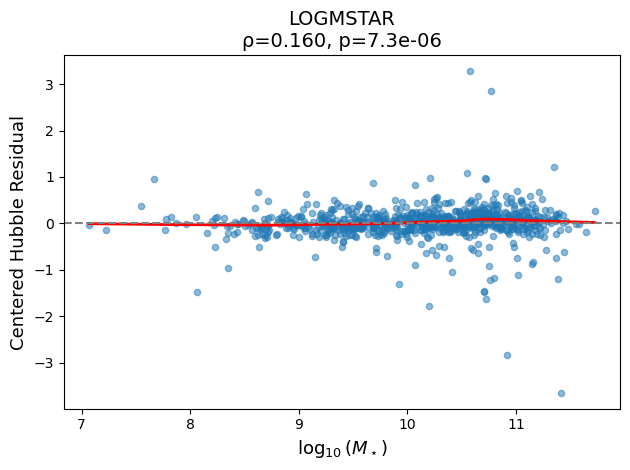

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr
import numpy as np

# --------------------------------------
# Load data
# --------------------------------------
df = pd.read_csv("ZTF_snia_DESI_fastspec_hostprops_with_residuals.csv")

lowess_result = sm.nonparametric.lowess(
    df["residual_centered"],
    df["LOGMSTAR"],
    frac=0.3,
    return_sorted=True
)

rho, p = spearmanr(df["LOGMSTAR"], df["residual_centered"])


# --------------------------------------
# Create figure
# --------------------------------------
plt.scatter(df["LOGMSTAR"], df["residual_centered"], alpha=0.5, s=20)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], lw=2, color="red")

# Labels and styling
plt.axhline(0, color="gray", ls="--")
plt.xlabel(r"$\log_{10}(M_\star)$", fontsize=13)
plt.ylabel("Centered Hubble Residual", fontsize=13)
plt.title(f"LOGMSTAR\nρ={rho:.3f}, p={p:.1e}", fontsize=14)
plt.tight_layout()
plt.show()